# Multi-class Classification

For this exercise, we will use multi-class logistic regression and neural networks to
recognize handwritten digits (from 0 to 9). 

In [39]:
from scipy.io import loadmat
import numpy as np
import random 
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #
import PIL 

In [4]:
#Load .mat data
data = loadmat('Datasets/ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [16]:
y = data['y']
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]

print('X:',X.shape, 'The data contains 400 features(20x20) + intercept and 5000 record')
print('y:',y.shape)

X: (5000, 401) The data contains 400 features(20x20) + intercept and 5000 record
y: (5000, 1)


### Display the Digits

each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a floating point number indicating the grayscale intensity at
that location

In [70]:
def DisplayDigits(X):
##This function aims to plot 100 randomly picked digits
    width, height = 20, 20
    nrows, ncols = 10, 10
    indices_to_display = np.random.choice(range(X.shape[0]), nrows * ncols)

    big_picture = np.zeros((height * nrows, width * ncols))

    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol = 0
        iimg = X[idx].reshape(width, height).T # transpose the data set
        big_picture[irow * height:irow * height + iimg.shape[0], icol * width:icol * width + iimg.shape[1]] = iimg
        icol += 1
        
        
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(big_picture,cmap=plt.cm.Greys_r)
    plt.axis('off')

    plt.show() 


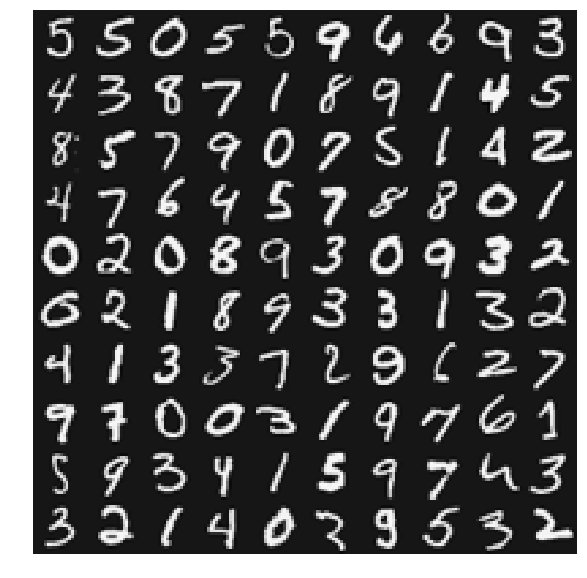

In [71]:
DisplayDigits(X[:,1:])

## 1-one-vs-all logistic regression

We will be using multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, we will need to train 10 separate logistic regression classifiers.

### Regularized Cost Function 
### $ J(\theta) = \frac{-1}{m}\sum_{i=1}^{m}y log(h_\theta(x)) + (1-y) log(1- h_\theta(x))  +  \frac{\gamma }{2m} \sum_{i=1}^{n} \theta_j^2$

### Regularized Gradient
### $\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^i) - y^i)x_j^i) $ &nbsp; &nbsp; &nbsp; for j =0 

### $\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^i) - y^i)x_j^i) + \frac{\gamma }{m} \theta_j^2 $&nbsp; &nbsp; &nbsp; for j > 0 

In [88]:
def sigmoid (z):
    return (1/(1 + np.exp(-z)))

In [89]:
def costFunction (theta,x,y, regPar):
    m = y.size
    h = sigmoid(x.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (regPar/(2*m))*np.sum(np.square(theta[1:]))
    
    return(J[0])    

In [97]:
def gradientDecenet(theta,x,y,regPar):
    m = y.size
    h = sigmoid(x.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*X.T.dot(h-y) + (regPar/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

 Now, will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the K classes in our dataset 

In [110]:
def oneVsAll(X, y, k, regPar):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
    thetas = np.zeros((k, X.shape[1])) #10x401

    for i in np.arange(1, k+1):
        res = minimize(costFunction, initial_theta, args=( X, (y == i)*1,regPar), method=None,
                       jac=gradientDecenet, options={'maxiter':100})
        thetas[i-1] = res.x
        
    return thetas

After training the one-vs-all classifier, we can now use it to predict thedigit contained in a given image. 
For each input, we should compute the “probability” that it belongs to each class using the trained logistic regressionclassifiers. 
The one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (1, 2,..., or K) as the prediction for the input example.

In [111]:
def predictOneVsAll(thetas, features):
    probs = sigmoid(X.dot(theta.T))
    
    return(np.argmax(probs, axis=1)+1) #this function returns the index of the highest probability 
#and we adding one because of the zero-based index of pyhton

In [112]:
theta= oneVsAll(X, y, 10, 0.1)

In [113]:
correct=0
for i in range (y.size):
    if (predictOneVsAll(theta, X)[i]== y[i]):
        correct +=1 

In [118]:
Accuracy = correct/y.size*100 
print ('The accuracy of the system =', Accuracy,'%')

The accuracy of the system = 94.94 %


### Case Study

[7]


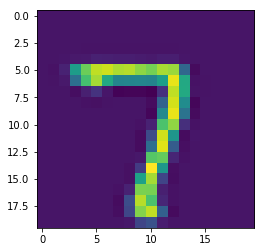

In [146]:
sample1 = np.random.choice(X.shape[0], 1)
print (predictOneVsAll(theta, X)[sample1])
plt.imshow(X[sample1,1:].reshape(-1,20).T)

[2]


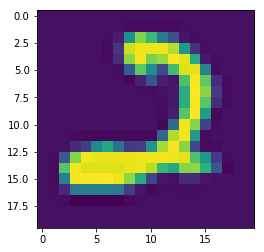

In [142]:
sample2 = np.random.choice(X.shape[0], 1)
print (predictOneVsAll(theta, X)[sample2])
plt.imshow(X[sample2,1:].reshape(-1,20).T)

[6]


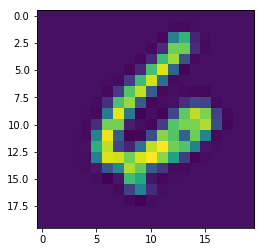

In [144]:
sample3 = np.random.choice(X.shape[0], 1)
print (predictOneVsAll(theta, X)[sample3])
plt.imshow(X[sample3,1:].reshape(-1,20).T)

## 2- Neural Network

Our neural network has 3 layers: an input layer, a
hidden layer and an output layer.



![Markdown](NN.png)

In [155]:
weights = loadmat('Datasets/ex3weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [156]:
theta1, theta2 = weights['Theta1'], weights['Theta2']

print('theta1: {}'.format(theta1.shape))
print('theta2: {}'.format(theta2.shape))

theta1: (25, 401)
theta2: (10, 26)


In [157]:
def neuralNetwork(theta1, theta2 , x):
    z2= np.dot(x, theta1.T)
    a2= sigmoid(z2)
    a2 = np.insert(a2,0,1,axis=1)
    z3= np.dot(a2, theta2.T)
    a3 = sigmoid(z3)
    
    return (np.argmax(a3, axis=1)+1) 

In [158]:
correctNN=0
for i in range (y.size):
    if (neuralNetwork(theta1, theta2, X)[i]== y[i]):
        correctNN +=1 

In [153]:
AccuracyNN = correctNN/y.size*100 
print ('The accuracy of the NN system =', AccuracyNN,'%')

The accuracy of the NN system = 97.52 %
